In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


# Columna para saber cual es de cual en el combinado
train['Dataset'] = 'Train'
test['Dataset'] = 'Test'
combo = pd.concat([train, test], ignore_index=True)

# first look at data
combo.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Dataset
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Train


In [37]:
#missing data train

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.DataFrame(percent)
print(missing_data*100)

                     0
CryoSleep     2.496261
ShoppingMall  2.392730
VIP           2.335212
HomePlanet    2.312205
Name          2.300702
Cabin         2.289198
VRDeck        2.162660
FoodCourt     2.105142
Spa           2.105142
Destination   2.093639
RoomService   2.082135
Age           2.059128
PassengerId   0.000000
Transported   0.000000
Dataset       0.000000


In [38]:
#missing data test

percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.DataFrame(percent)
print(missing_data*100)

                     0
FoodCourt     2.478373
Spa           2.361468
Cabin         2.338087
ShoppingMall  2.291326
Name          2.197802
CryoSleep     2.174421
VIP           2.174421
Destination   2.151040
Age           2.127660
HomePlanet    2.034136
RoomService   1.917232
VRDeck        1.870470
PassengerId   0.000000
Dataset       0.000000


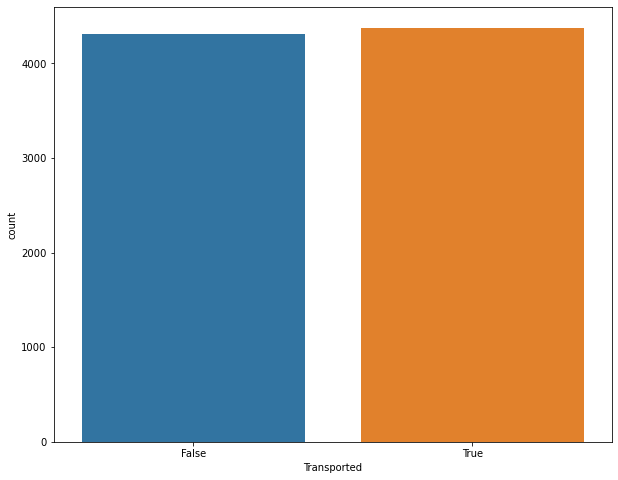

In [39]:
# Variable dependiente balanceada
plt.figure(figsize=(10, 8))
sns.countplot(data=train, x="Transported")
plt.show()

In [53]:
#Bastante inutil tener booleanos, fuera eso
train['Transported'] = train['Transported'].map({False: 0, True: 1})
combo['Transported'] = combo['Transported'].map({False: 0, True: 1})

In [41]:
#Hacer imputación porque no hay balance es los count
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


Vueltita a la imputación de valores:
   - Se puede aplicar algoritmo como MissForest, no se si se puede pero facilito 
   - Rellenar con análisis cada variable, no son tantos valores perdidos

In [42]:
# Los 4 primeros digitos indican el grupo al que pertenecen, se puede analizar cada grupo por separado
train['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [54]:
# Se estudia cuantos grupos hay de X tamaño
def tam_grupos(df):
    data = df.copy()
    # Reescribo cada PassengerId dejando solo el grupo
    data['PassengerId'] = data['PassengerId'].apply(lambda x: int(x[:4]))
    data['group_size'] = data['PassengerId'].value_counts()

    return data


combo_grupos = tam_grupos(combo)

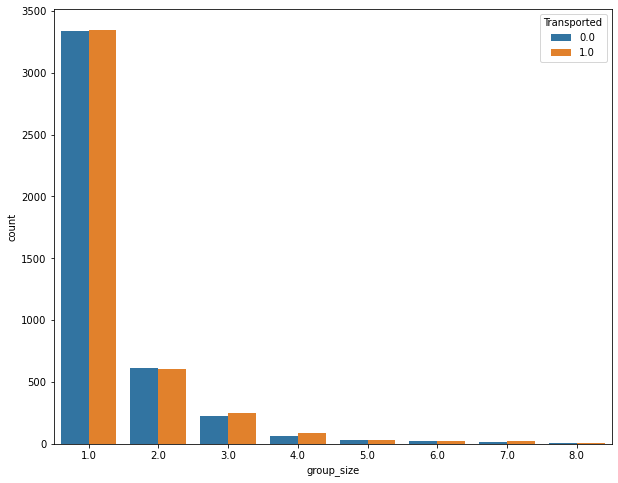

In [55]:
plt.figure(figsize=(10, 8))
sns.countplot(data=combo_grupos, x=combo_grupos['group_size'], hue='Transported')
plt.show()

Esto esta mal en algun punto


https://www.kaggle.com/code/dmitryuarov/spaceship-advanced-eda-lgbm-cb-xgb#-EDA-|-Feature-engineering
https://www.kaggle.com/code/elky96/spaceship-titanic-extensive-eda